In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
path="/content/drive/MyDrive/dataset/Vegetable_market.csv"
data=pd.read_csv(path)


In [ ]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Clean Vegetable condition column
    df['Vegetable condition'] = df['Vegetable condition'].replace({'scarp': 'scrap'})
    
    # Binary encoding
    df['Deasaster Happen in last 3month'] = df['Deasaster Happen in last 3month'].replace({'no': 0, 'yes': 1})

     # Ordinal encoding
    df['Month'] = df['Month'].replace({
        'jan': 1,
        'apr': 4,
        'july': 7,
        'sept': 9,
        'oct': 10,
        'dec': 12,
        'may': 5,
        'aug': 8,
        'june': 6,
        ' ': np.NaN,
        'march': 3
    })

    # Fill missing month values with column mode
    df['Month'] = df['Month'].fillna(df['Month'].mode()[0])
    
    # One-hot encoding
    for column in ['Vegetable', 'Season', 'Vegetable condition']:
        df = onehot_encode(df, column)
    
    # Split df into X and y
    y = df['Price per kg']
    X = df.drop('Price per kg', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

In [ ]:
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print("DecisioncTree trained.")


DecisioncTree trained.


In [ ]:
A=data['Vegetable']

In [ ]:
f=pd.DataFrame({'Actual':y_test,'Predicted' :pred})

In [ ]:
t=f['Predicted']
T=f['Actual']

In [ ]:
farmerspay = (70 * t)/100

In [ ]:
retailerspay=(30*t)/100

In [ ]:
H=pd.DataFrame({'Vegetables':A,'Actual Price':T,'Predicted Price':t,'Farmers Pay':farmerspay,'Retailers Pay':retailerspay})

In [ ]:
G=H.dropna()

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt

In [ ]:
DF = pd.DataFrame(G, columns=["Vegetables","Actual Price","Predicted Price","Farmers Pay"])
 
# plot the dataframe
DF.plot(x="Vegetables", y=["Actual Price","Predicted Price","Farmers Pay"], kind="bar", figsize=(9, 8))
plt.ylabel("Prices")
# print bar graph
mp.show()

In [ ]:
DF = pd.DataFrame(G, columns=["Vegetables","Predicted Price","Farmers Pay","Retailers Pay"])
 
# plot the dataframe
DF.plot(x="Vegetables", y=["Predicted Price","Farmers Pay","Retailers Pay"], kind="bar", figsize=(9, 8))
plt.ylabel("Prices")
# print bar graph
mp.show()

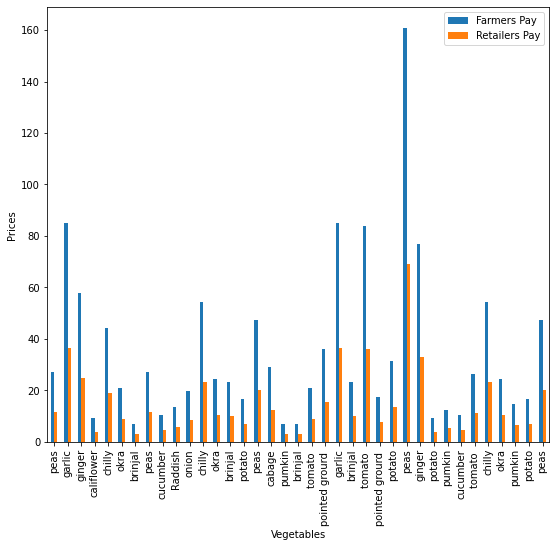

In [ ]:
DF = pd.DataFrame(G, columns=["Vegetables","Farmers Pay","Retailers Pay"])
 
# plot the dataframe
DF.plot(x="Vegetables", y=["Farmers Pay","Retailers Pay"], kind="bar", figsize=(9, 8))
plt.ylabel("Prices")
# print bar graph
mp.show()